In [1]:
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

In [61]:
# Vamos a crear un dataframe calendario que nos va a permitir manejar mejor los datos para el dashboard en powerBI.

fechas = pd.date_range(start='2014-01-01', end='2024-06-30', freq='Q')
df_calendario = pd.DataFrame(fechas, columns=['Fecha'])

In [62]:
df_calendario['Año'] = df_calendario['Fecha'].dt.year
df_calendario['Trimestre'] = df_calendario['Fecha'].dt.quarter

In [63]:
df_calendario['id'] = df_calendario['Año'].astype(str).str.cat(df_calendario['Trimestre'].astype(str),sep='-')

In [64]:
df_calendario.tail()

,Fecha,Año,Trimestre,id
37,2023-06-30,2023,2,2023-2
38,2023-09-30,2023,3,2023-3
39,2023-12-31,2023,4,2023-4
40,2024-03-31,2024,1,2024-1
41,2024-06-30,2024,2,2024-2


In [65]:
df_calendario['id'].is_unique

True

In [66]:
df_calendario.to_excel('Procesed data/df_calendario.xlsx', index=False)

In [ ]:
# Tambien vamos a crear un dataframe con las provincias que nos va a facilitar el manejo de datos en el Dashboard.

In [149]:
localidades = pd.read_excel('Raw data\Internet (Principal).xlsx', sheet_name='Accesos_tecnologia_localidad')
localidades.head()

,Provincia,Partido,Localidad,Tecnologia,Link Indec,Accesos
0,BUENOS AIRES,25 de Mayo,25 de Mayo,ADSL,6854100,755.0
1,BUENOS AIRES,25 de Mayo,25 de Mayo,CABLEMODEM,6854100,4600.0
2,BUENOS AIRES,25 de Mayo,25 de Mayo,FIBRA OPTICA,6854100,2.0
3,BUENOS AIRES,25 de Mayo,25 de Mayo,SATELITAL,6854100,742.0
4,BUENOS AIRES,25 de Mayo,25 de Mayo,WIRELESS,6854100,727.0


In [150]:
provincias = localidades[['Provincia']]
provincias.head()

,Provincia
0,BUENOS AIRES
1,BUENOS AIRES
2,BUENOS AIRES
3,BUENOS AIRES
4,BUENOS AIRES


In [151]:
provincias.drop_duplicates(inplace=True)
provincias.count()

C:\Users\franc\AppData\Local\Temp\ipykernel_8224\3425974535.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  provincias.drop_duplicates(inplace=True)


Provincia    24
dtype: int64

In [152]:
provincias['Pais'] = 'Argentina'

C:\Users\franc\AppData\Local\Temp\ipykernel_8224\485025931.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  provincias['Pais'] = 'Argentina'


In [153]:
provincias

,Provincia,Pais
0,BUENOS AIRES,Argentina
2313,CABA,Argentina
2320,CATAMARCA,Argentina
2450,CHACO,Argentina
2651,CHUBUT,Argentina
2791,CORDOBA,Argentina
3680,CORRIENTES,Argentina
3848,ENTRE RIOS,Argentina
4158,FORMOSA,Argentina
4285,JUJUY,Argentina


In [154]:
provincias.to_excel('Procesed data/provincias.xlsx', index=False)

In [ ]:
# Vamos a utilizar el archivo principal y seleccionamos las hojas que pueden ser de mas utilidad. 

HOJA Velocidad % por prov

In [6]:
vel_por_prov = pd.read_excel('Raw data\Internet (Principal).xlsx', sheet_name='Velocidad % por prov')

In [7]:
vel_por_prov.head()

,Año,Trimestre,Provincia,Mbps (Media de bajada)
0,2024,2,Buenos Aires,157.41
1,2024,2,Capital Federal,233.01
2,2024,2,Catamarca,97.38
3,2024,2,Chaco,107.76
4,2024,2,Chubut,21.67


In [ ]:
# Tenemos que explorar: 
# Valores faltantes, valores atipicos, duplicados, etc.

In [8]:
vel_por_prov.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1008 entries, 0 to 1007
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Año                     1008 non-null   int64  
 1   Trimestre               1008 non-null   int64  
 2   Provincia               1008 non-null   object 
 3   Mbps (Media de bajada)  1008 non-null   float64
dtypes: float64(1), int64(2), object(1)
memory usage: 31.6+ KB


In [9]:
vel_por_prov['Mbps (Media de bajada)'].describe()

count    1008.000000
mean       24.720245
std        33.660764
min         2.573729
25%         4.866698
50%        10.089315
75%        29.875292
max       234.440000
Name: Mbps (Media de bajada), dtype: float64

In [12]:
# Vamos a borrar los acentos que tienen los nombres de las provincias.

from unidecode import unidecode

In [ ]:
vel_por_prov['Provincia'] = vel_por_prov['Provincia'].apply(unidecode)

In [ ]:
vel_por_prov

,Año,Trimestre,Provincia,Mbps (Media de bajada)
0,2024,2,Buenos Aires,157.410000
1,2024,2,Capital Federal,233.010000
2,2024,2,Catamarca,97.380000
3,2024,2,Chaco,107.760000
4,2024,2,Chubut,21.670000
...,...,...,...,...
1003,2014,1,Santa Cruz,3.315991
1004,2014,1,Santa Fe,3.147407
1005,2014,1,Santiago Del Estero,2.949472
1006,2014,1,Tierra Del Fuego,3.446888


In [15]:
# Guardamos este dataset ya limpio para ser usado en el dsahboard.

vel_por_prov.to_excel('Procesed data/vel-por-prov.xlsx', index=False)

SE PUEDE OBSERVAR QUE PARA ESTE DATASET, NO TENEMOS VALORES FALTANTES, DUPLICADOS NI ATIPICOS. (ver de agregar graficos de ser necesario)

HOJA Totales VMD

In [93]:
totales_vmd = pd.read_excel('Raw data\Internet (Principal).xlsx', sheet_name='Totales VMD')

In [98]:
totales_vmd.head(5)

,Año,Trimestre,Mbps (Media de bajada),Trimestre.1
0,2024,2,139.25,Abr-Jun 2024
1,2024,1,139.15,Ene-Mar 2024
2,2023,4,139.04,Oct-Dic 2023
3,2023,3,129.67,Jul-Sept 2023
4,2023,2,123.95,Abr-Jun 2023


In [99]:
totales_vmd.drop(labels='Trimestre.1', axis=1, inplace=True)

In [101]:
# Agregamos id para mayor organizacion.

totales_vmd['id'] = totales_vmd['Año'].astype(str).str.cat(totales_vmd['Trimestre'].astype(str),sep='-')

In [103]:
totales_vmd['id'].is_unique

True

In [102]:
totales_vmd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42 entries, 0 to 41
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Año                     42 non-null     int64  
 1   Trimestre               42 non-null     int64  
 2   Mbps (Media de bajada)  42 non-null     float64
 3   id                      42 non-null     object 
dtypes: float64(1), int64(2), object(1)
memory usage: 1.4+ KB


In [ ]:
# Vamos a ver la evolucion de la velocidad a lo largo de los años en Argentina.

In [104]:
promedio_por_año = totales_vmd.groupby('Año')['Mbps (Media de bajada)'].mean().reset_index()

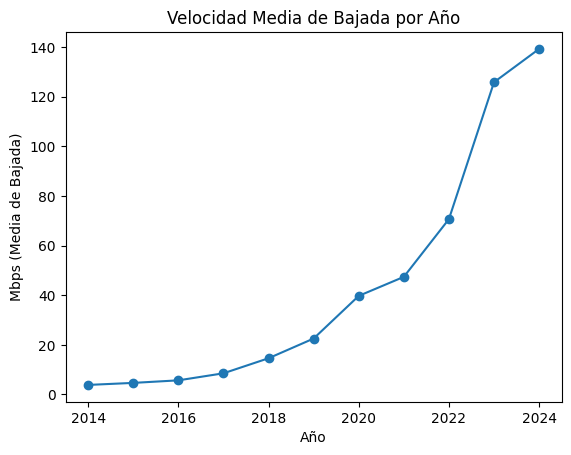

In [105]:
# Crear el gráfico de dispersión
plt.plot(promedio_por_año['Año'], promedio_por_año['Mbps (Media de bajada)'], marker='o', label='Velocidad Media de Bajada por Año')

# Añadir títulos y etiquetas
plt.title('Velocidad Media de Bajada por Año')
plt.xlabel('Año')
plt.ylabel('Mbps (Media de Bajada)')

# Mostrar el gráfico
plt.show()


PODEMOS VER UN AUMENTO CONTINUO DE LA MEDIA DE VELOCIDAD DE BAJADA DE INTERNET A LO LARO DE LOS AÑOS, ASI COMO TAMBIEN UNA ACELERACION DEL CRECIMIENTO DE LA VELOCIDAD DESDE EL 2018 EN ADELANTE. 

In [106]:
# Guardamos los datos en un archivo nuevo.

totales_vmd.to_excel('Procesed data/totales_vmd.xlsx', index=False)

HOJA Accesos_tecnologia_localidad

In [16]:
accesos_tecnologia_localidad = pd.read_excel('Raw data\Internet (Principal).xlsx', sheet_name='Accesos_tecnologia_localidad')

In [17]:
accesos_tecnologia_localidad.head()

,Provincia,Partido,Localidad,Tecnologia,Link Indec,Accesos
0,BUENOS AIRES,25 de Mayo,25 de Mayo,ADSL,6854100,755.0
1,BUENOS AIRES,25 de Mayo,25 de Mayo,CABLEMODEM,6854100,4600.0
2,BUENOS AIRES,25 de Mayo,25 de Mayo,FIBRA OPTICA,6854100,2.0
3,BUENOS AIRES,25 de Mayo,25 de Mayo,SATELITAL,6854100,742.0
4,BUENOS AIRES,25 de Mayo,25 de Mayo,WIRELESS,6854100,727.0


In [18]:
accesos_tecnologia_localidad.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7753 entries, 0 to 7752
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Provincia   7753 non-null   object 
 1   Partido     7753 non-null   object 
 2   Localidad   7753 non-null   object 
 3   Tecnologia  7753 non-null   object 
 4   Link Indec  7753 non-null   object 
 5   Accesos     7747 non-null   float64
dtypes: float64(1), object(5)
memory usage: 363.6+ KB


In [19]:
accesos_tecnologia_localidad['Accesos'].isna().sum()

6

In [20]:
# Vemos que existen valores faltantes. 

accesos_tecnologia_localidad[accesos_tecnologia_localidad['Accesos'].isna()]

,Provincia,Partido,Localidad,Tecnologia,Link Indec,Accesos
3755,CORRIENTES,Ituzaingó,Colonia Liebig's,Otros,18084010,NaN
4101,ENTRE RIOS,Tala,Rosario del Tala,Otros,30091100,NaN
5744,SALTA,Cafayate,Tolombón,Otros,66021020,NaN
6005,SALTA,San Carlos,Animaná,Otros,66154020,NaN
6010,SALTA,San Carlos,San Carlos,Otros,66154040,NaN
7372,SANTIAGO DEL ESTERO,Choya,Frías,Otros,86063040,NaN


In [21]:
# Debido a que son 6 localidades dentro de 7753, se decide colocar como cantidad de 
# accesos el valor 0, ya que estas localidades equivalen al 0,07% de la totalidad.

accesos_tecnologia_localidad['Accesos'].fillna(0, inplace=True)

In [22]:
# Borramos la columna 'Link Indec' ya que no aporta informacion util.

accesos_tecnologia_localidad.drop(labels='Link Indec', axis=1, inplace=True)

In [23]:
accesos_tecnologia_localidad.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7753 entries, 0 to 7752
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Provincia   7753 non-null   object 
 1   Partido     7753 non-null   object 
 2   Localidad   7753 non-null   object 
 3   Tecnologia  7753 non-null   object 
 4   Accesos     7753 non-null   float64
dtypes: float64(1), object(4)
memory usage: 303.0+ KB


In [24]:
# Sacamos los acentos de los nombres de las provincias.

accesos_tecnologia_localidad['Provincia'] = accesos_tecnologia_localidad['Provincia'].apply(unidecode)

In [25]:
accesos_tecnologia_localidad['Provincia'].unique()

array(['BUENOS AIRES', 'CABA', 'CATAMARCA', 'CHACO', 'CHUBUT', 'CORDOBA',
       'CORRIENTES', 'ENTRE RIOS', 'FORMOSA', 'JUJUY', 'LA PAMPA',
       'LA RIOJA', 'MENDOZA', 'MISIONES', 'NEUQUEN', 'RIO NEGRO', 'SALTA',
       'SAN JUAN', 'SAN LUIS', 'SANTA CRUZ', 'SANTA FE',
       'SANTIAGO DEL ESTERO', 'TIERRA DEL FUEGO', 'TUCUMAN'], dtype=object)

In [26]:
# Guardamos la hoja en un nuevo archivo.

accesos_tecnologia_localidad.to_excel('Procesed data/accesos-tecnologia-localidad.xlsx', index=False)

HOJA Totales Accesos Por Tecnología

In [107]:
accesos_internet_tecnologia = pd.read_excel('Raw data\Internet (Principal).xlsx', sheet_name='Totales Accesos Por Tecnología')

In [108]:
accesos_internet_tecnologia.head()

,Año,Trimestre,ADSL,Cablemodem,Fibra óptica,Wireless,Otros,Total,Periodo
0,2024,2,733491,5867504,4169958,593197,191957,11556107,Abr-Jun 2024
1,2024,1,774475,5986957,4015101,598682,257941,11633156,Ene-Mar 2024
2,2023,4,836390,6022532,3908183,585760,194796,11547661,Oct-Dic 2023
3,2023,3,897895,6018832,3708718,581436,200027,11406908,Jul-Sept 2023
4,2023,2,1006509,5997149,3463988,581823,202428,11251897,Abr-Jun 2023


In [109]:
accesos_internet_tecnologia.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42 entries, 0 to 41
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Año           42 non-null     int64 
 1   Trimestre     42 non-null     int64 
 2   ADSL          42 non-null     int64 
 3   Cablemodem    42 non-null     int64 
 4   Fibra óptica  42 non-null     int64 
 5   Wireless      42 non-null     int64 
 6   Otros         42 non-null     int64 
 7   Total         42 non-null     int64 
 8   Periodo       42 non-null     object
dtypes: int64(8), object(1)
memory usage: 3.1+ KB


In [110]:
accesos_internet_tecnologia['Periodo'].is_unique

True

In [ ]:
# Vemos que no hay valores nulos ni duplicados. Falta determinar si hay valores atipicos.

In [111]:
# Vamos a eliminar la columna 'periodo'.

accesos_internet_tecnologia.drop(labels='Periodo', axis=1, inplace=True)

In [112]:
accesos_internet_tecnologia.head()

,Año,Trimestre,ADSL,Cablemodem,Fibra óptica,Wireless,Otros,Total
0,2024,2,733491,5867504,4169958,593197,191957,11556107
1,2024,1,774475,5986957,4015101,598682,257941,11633156
2,2023,4,836390,6022532,3908183,585760,194796,11547661
3,2023,3,897895,6018832,3708718,581436,200027,11406908
4,2023,2,1006509,5997149,3463988,581823,202428,11251897


In [ ]:
# Vamos a agregar una columna con la fecha conjunta llamada 'id'. Esto nos va a facilitar luego el 
# manejo de datos en el dashboard.

In [113]:
accesos_internet_tecnologia['id'] = accesos_internet_tecnologia['Año'].astype(str).str.cat(accesos_internet_tecnologia['Trimestre'].astype(str),sep='-')

In [114]:
accesos_internet_tecnologia.head()

,Año,Trimestre,ADSL,Cablemodem,Fibra óptica,Wireless,Otros,Total,id
0,2024,2,733491,5867504,4169958,593197,191957,11556107,2024-2
1,2024,1,774475,5986957,4015101,598682,257941,11633156,2024-1
2,2023,4,836390,6022532,3908183,585760,194796,11547661,2023-4
3,2023,3,897895,6018832,3708718,581436,200027,11406908,2023-3
4,2023,2,1006509,5997149,3463988,581823,202428,11251897,2023-2


In [115]:
accesos_internet_tecnologia['id'].is_unique

True

In [117]:
# Calcular la media de los accesos por año para graficar los valores de cada tecnologia

media_por_anio = accesos_internet_tecnologia.drop(labels='id', axis=1).groupby('Año').mean().reset_index()

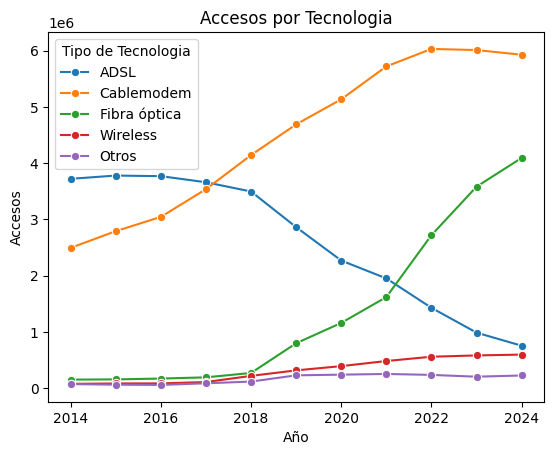

In [118]:
# Crear el gráfico de líneas
sns.lineplot(x='Año', y='ADSL', data=media_por_anio, marker='o', label='ADSL')
sns.lineplot(x='Año', y='Cablemodem', data=media_por_anio, marker='o', label='Cablemodem')
sns.lineplot(x='Año', y='Fibra óptica', data=media_por_anio, marker='o', label='Fibra óptica')
sns.lineplot(x='Año', y='Wireless', data=media_por_anio, marker='o', label='Wireless')
sns.lineplot(x='Año', y='Otros', data=media_por_anio, marker='o', label='Otros')

# Añadir títulos y etiquetas
plt.title('Accesos por Tecnologia')
plt.xlabel('Año')
plt.ylabel('Accesos')
plt.legend(title='Tipo de Tecnologia')

# Mostrar el gráfico
plt.show()



PODEMOS VER QUE LAS CURVAS SON SUAVES, NO TIENEN SALTOS, POR LO TANTO NO TENEMOS VALORES ATIPICOS. 

TAMBIEN PODEMOS VER UNA TENDENCIA EN EL CRECIMIENTO DE TECNOLOGIAS COMO LA FIBRA OPTICA, CABLEMODEM (SI BIEN EN LOS ULTIMOS DOS AÑOS DESCENDIO) Y UN DESCENSO MUY MARCADO EN EL USO DE LA TECNOLOIA ADSL.

In [122]:
# Guardamos el dataset en un archivo.

accesos_internet_tecnologia.to_excel('Procesed data/accesos-internet-tecnologia.xlsx', index=False)

HOJA Accesos Por Tecnología

In [14]:
accesos_tecnologia_provincia = pd.read_excel('Raw data\Internet (Principal).xlsx', sheet_name='Accesos Por Tecnología')

In [15]:
accesos_tecnologia_provincia.head()

,Año,Trimestre,Provincia,ADSL,Cablemodem,Fibra óptica,Wireless,Otros,Total
0,2024,2,Buenos Aires,214055.0,2722466.0,1849476.0,138638.0,64745.0,4989380.0
1,2024,2,Capital Federal,54102.0,1144781.0,230402.0,4493.0,29821.0,1463599.0
2,2024,2,Catamarca,4951.0,10303.0,58355.0,1384.0,81.0,75074.0
3,2024,2,Chaco,9448.0,57935.0,68944.0,8407.0,2358.0,147092.0
4,2024,2,Chubut,25955.0,80704.0,26516.0,31118.0,9930.0,174223.0


In [16]:
accesos_tecnologia_provincia.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1009 entries, 0 to 1008
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Año           1008 non-null   object 
 1   Trimestre     1008 non-null   object 
 2   Provincia     1007 non-null   object 
 3   ADSL          1007 non-null   float64
 4   Cablemodem    1007 non-null   float64
 5   Fibra óptica  1007 non-null   float64
 6   Wireless      1007 non-null   float64
 7   Otros         1007 non-null   float64
 8   Total         1007 non-null   float64
dtypes: float64(6), object(3)
memory usage: 71.1+ KB


In [ ]:
# Veamos que valores no son numeros enteros en la columna 'Año'.

accesos_tecnologia_provincia[~accesos_tecnologia_provincia['Año'].apply(lambda x: isinstance(x, int))]

,Año,Trimestre,Provincia,ADSL,Cablemodem,Fibra óptica,Wireless,Otros,Total
455,2019 *,3 *,Buenos Aires,1277249.0,2144956.0,425386.0,85572.0,27070.0,3960233.0
456,2019 *,3 *,Capital Federal,300288.0,1080973.0,24900.0,3895.0,31155.0,1441211.0
457,2019 *,3 *,Catamarca,24349.0,5543.0,13.0,244.0,2251.0,32400.0
458,2019 *,3 *,Chaco,50416.0,49156.0,8063.0,5224.0,1592.0,114451.0
459,2019 *,3 *,Chubut,37298.0,27090.0,1917.0,15149.0,7551.0,89005.0
...,...,...,...,...,...,...,...,...,...
524,2019 *,1 *,Santiago Del Estero,25337.0,61547.0,23.0,2847.0,99.0,89853.0
525,2019 *,1 *,Tierra Del Fuego,19789.0,23549.0,1623.0,0.0,1486.0,46447.0
526,2019 *,1 *,Tucumán,159215.0,11670.0,118.0,678.0,321.0,172002.0
1007,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


VEMOS QUE HAY DATOS QUE INDICAN QUE EN EL AÑO 2019 SE TOMARON VALORES QUE NO COINCIDEN A NIVEL NACIONAL. EN EL CASO DE USAR ESTA TABLA, HAY QUE TENER EN CUENTA ESTE AVISO.

In [ ]:
# Para poder hacer uso de esta tabla, tenemos que limpiar los datos 
# de la columna 'Año' y 'Trimestre', y borrar los datos faltantes.

In [37]:
accesos_tecnologia_provincia.tail()

,Año,Trimestre,Provincia,ADSL,Cablemodem,Fibra óptica,Wireless,Otros,Total
1004,2014,1,Santiago Del Estero,32567.0,3598.0,19.0,915.0,34.0,37133.0
1005,2014,1,Tierra Del Fuego,21618.0,2837.0,648.0,1.0,2934.0,28038.0
1006,2014,1,Tucumán,129717.0,83.0,121.0,13.0,98.0,130032.0
1007,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1008,*,Los datos provinciales no coinciden a nivel na...,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# Borramos las dos ultimas filas.

accesos_tecnologia_provincia.drop(axis=0, inplace=True, index=[1007, 1008])

In [39]:
accesos_tecnologia_provincia.tail()

,Año,Trimestre,Provincia,ADSL,Cablemodem,Fibra óptica,Wireless,Otros,Total
1002,2014,1,Santa Cruz,18927.0,100.0,381.0,4092.0,3264.0,26764.0
1003,2014,1,Santa Fe,322662.0,174296.0,3059.0,5951.0,644.0,506612.0
1004,2014,1,Santiago Del Estero,32567.0,3598.0,19.0,915.0,34.0,37133.0
1005,2014,1,Tierra Del Fuego,21618.0,2837.0,648.0,1.0,2934.0,28038.0
1006,2014,1,Tucumán,129717.0,83.0,121.0,13.0,98.0,130032.0


In [40]:
# Reemplazamos los valores que tienen '*' y luego convertimos a tipo entero.

accesos_tecnologia_provincia = accesos_tecnologia_provincia.map(lambda x: x.replace('*', '') if isinstance(x, str) else x)

In [41]:
accesos_tecnologia_provincia['Año'] = accesos_tecnologia_provincia['Año'].astype(int)
accesos_tecnologia_provincia['Trimestre'] = accesos_tecnologia_provincia['Trimestre'].astype(int)

In [42]:
accesos_tecnologia_provincia.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1007 entries, 0 to 1006
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Año           1007 non-null   int32  
 1   Trimestre     1007 non-null   int32  
 2   Provincia     1007 non-null   object 
 3   ADSL          1007 non-null   float64
 4   Cablemodem    1007 non-null   float64
 5   Fibra óptica  1007 non-null   float64
 6   Wireless      1007 non-null   float64
 7   Otros         1007 non-null   float64
 8   Total         1007 non-null   float64
dtypes: float64(6), int32(2), object(1)
memory usage: 63.1+ KB


In [ ]:
# Por ultimo guardamos el dataset listo para su consumo.

In [44]:
accesos_tecnologia_provincia.to_excel('Procesed data/accesos-tecnologia-provincia.xlsx', index=False)

HOJA Penetración-poblacion

In [27]:
penetracion_poblacion = pd.read_excel('Raw data\Internet (Principal).xlsx', sheet_name='Penetración-poblacion')

In [28]:
penetracion_poblacion.head()

,Año,Trimestre,Provincia,Accesos por cada 100 hab
0,2024,2,Buenos Aires,27.43
1,2024,2,Capital Federal,47.44
2,2024,2,Catamarca,17.50
3,2024,2,Chaco,11.78
4,2024,2,Chubut,26.46


In [29]:
penetracion_poblacion.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 4 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Año                       1000 non-null   int64  
 1   Trimestre                 1000 non-null   int64  
 2   Provincia                 1000 non-null   object 
 3   Accesos por cada 100 hab  1000 non-null   float64
dtypes: float64(1), int64(2), object(1)
memory usage: 31.4+ KB


In [30]:
# Vemos que valores faltantes no tiene, hay que ver duplicados y atipicos. 

promedio_por_año = penetracion_poblacion[['Año', 'Accesos por cada 100 hab']].groupby('Año').mean('Accesos por cada 100 hab')

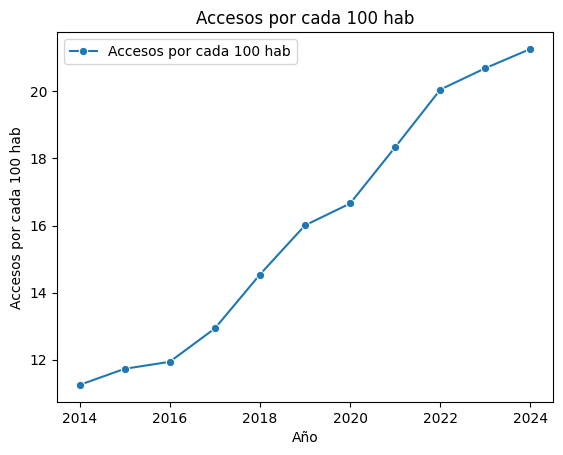

In [31]:
# Crear el gráfico de líneas
sns.lineplot(x='Año', y='Accesos por cada 100 hab', data=promedio_por_año, marker='o', label='Accesos por cada 100 hab')

# Añadir títulos y etiquetas
plt.title('Accesos por cada 100 hab')
plt.xlabel('Año')
plt.ylabel('Accesos por cada 100 hab')

# Mostrar el gráfico
plt.show()

PODEMOS VER QUE EL COMPORTAMIENTO DE LA CURVA ES SUAVE, LO QUE DENOTA QUE NO HAY VALORES ATIPICOS. 

POR OTRO LADO SE PUEDE OBSERVAR QUE TENEMOS UN CRECIMIENTO AÑO TRAS AÑO DE LA PENETRACION EN LA POBLACION.

In [32]:
# Eliminamos los acentos de la columna Provincias.

penetracion_poblacion['Provincia'] = penetracion_poblacion['Provincia'].apply(unidecode)

In [33]:
penetracion_poblacion['Provincia']

0         Buenos Aires
1      Capital Federal
2            Catamarca
3                Chaco
4               Chubut
            ...       
995           La Rioja
996            Mendoza
997           Misiones
998            Neuquen
999          Rio Negro
Name: Provincia, Length: 1000, dtype: object

In [34]:
# Guardamos el archivo para su posterior uso.

penetracion_poblacion.to_excel('Procesed data/penetracion-poblacion.xlsx', index=False)

HOJA Penetracion-hogares

In [35]:
penetracion_hogares = pd.read_excel('Raw data\Internet (Principal).xlsx', sheet_name='Penetracion-hogares')

In [36]:
penetracion_hogares.head()

,Año,Trimestre,Provincia,Accesos por cada 100 hogares
0,2024,2,Buenos Aires,79.84
1,2024,2,Capital Federal,116.37
2,2024,2,Catamarca,68.81
3,2024,2,Chaco,44.06
4,2024,2,Chubut,86.33


In [37]:
penetracion_hogares.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 4 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Año                           1000 non-null   int64  
 1   Trimestre                     1000 non-null   int64  
 2   Provincia                     1000 non-null   object 
 3   Accesos por cada 100 hogares  1000 non-null   float64
dtypes: float64(1), int64(2), object(1)
memory usage: 31.4+ KB


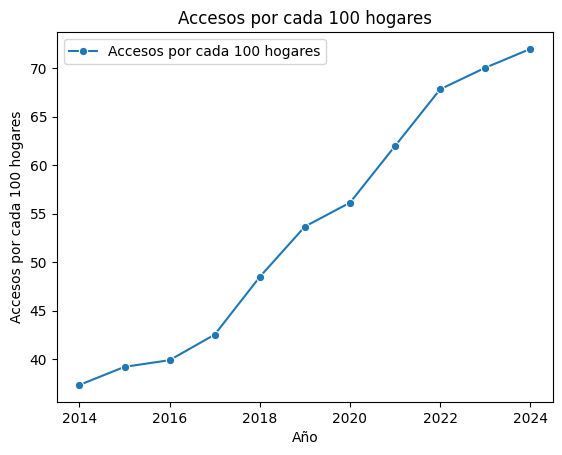

In [38]:
promedio_por_año = penetracion_hogares[['Año', 'Accesos por cada 100 hogares']].groupby('Año').mean('Accesos por cada 100 hogares')

# Crear el gráfico de líneas
sns.lineplot(x='Año', y='Accesos por cada 100 hogares', data=promedio_por_año, marker='o', label='Accesos por cada 100 hogares')

# Añadir títulos y etiquetas
plt.title('Accesos por cada 100 hogares')
plt.xlabel('Año')
plt.ylabel('Accesos por cada 100 hogares')

# Mostrar el gráfico
plt.show()

AL IGUAL QUE LA PENETRACION POR HABITANTES, LA PENETRACION POR HOGAR TIENE UN CRECIMIENTO AÑO TRAS AÑO.

In [39]:
# Eliminamos los acentos de las Provincias.

penetracion_hogares['Provincia'] = penetracion_hogares['Provincia'].apply(unidecode)

In [40]:
penetracion_hogares['Provincia']

0         Buenos Aires
1      Capital Federal
2            Catamarca
3                Chaco
4               Chubut
            ...       
995           La Rioja
996            Mendoza
997           Misiones
998            Neuquen
999          Rio Negro
Name: Provincia, Length: 1000, dtype: object

In [41]:
# Guardamos el archivo.

penetracion_hogares.to_excel('Procesed data/penetracion-hogares.xlsx', index=False)

HOJA Penetracion-totales

In [42]:
penetracion_totales = pd.read_excel('Raw data\Internet (Principal).xlsx', sheet_name='Penetracion-totales')

In [43]:
penetracion_totales.head()

,Año,Trimestre,Accesos por cada 100 hogares,Accesos por cada 100 hab,Periodo
0,2024,2,78.13,24.57,Abr-Jun 2024
1,2024,1,78.89,24.79,Ene-Mar 2024
2,2023,4,78.56,24.66,Oct-Dic 2023
3,2023,3,77.84,24.41,Jul-Sept 2023
4,2023,2,77.02,24.14,Abr-Jun 2023


In [44]:
penetracion_totales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42 entries, 0 to 41
Data columns (total 5 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Año                           42 non-null     int64  
 1   Trimestre                     42 non-null     int64  
 2   Accesos por cada 100 hogares  42 non-null     float64
 3   Accesos por cada 100 hab      42 non-null     float64
 4   Periodo                       42 non-null     object 
dtypes: float64(2), int64(2), object(1)
memory usage: 1.8+ KB


In [45]:
# Vamos a eliminar la columna Periodo que no nos brinda ninguna informacion util.

penetracion_totales.drop(labels='Periodo', axis=1, inplace=True)

In [46]:
penetracion_totales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42 entries, 0 to 41
Data columns (total 4 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Año                           42 non-null     int64  
 1   Trimestre                     42 non-null     int64  
 2   Accesos por cada 100 hogares  42 non-null     float64
 3   Accesos por cada 100 hab      42 non-null     float64
dtypes: float64(2), int64(2)
memory usage: 1.4 KB


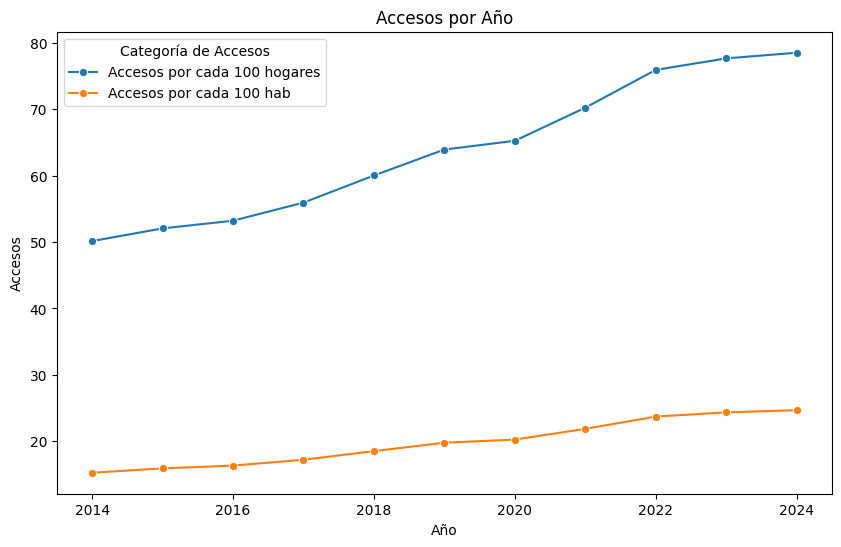

In [47]:
promedio_por_año = penetracion_totales[['Año', 'Accesos por cada 100 hogares', 'Accesos por cada 100 hab']].groupby('Año').mean()

# Graficamos para visualizar el comportamiento

plt.figure(figsize=(10, 6))
sns.lineplot(x='Año', y='Accesos por cada 100 hogares', data=promedio_por_año, marker='o', label='Accesos por cada 100 hogares')
sns.lineplot(x='Año', y='Accesos por cada 100 hab', data=promedio_por_año, marker='o', label='Accesos por cada 100 hab')

# Añadir títulos y etiquetas
plt.title('Accesos por Año')
plt.xlabel('Año')
plt.ylabel('Accesos')
plt.legend(title='Categoría de Accesos')

# Mostrar el gráfico
plt.show()


PODEMOS VER QUE AMBAS CURVAS TIENEN UN COMPORTAMIENTO SIMILAR Y CRECEN EN SIMULTANEO.

In [48]:
# Vamos a crear una columna id para que los datos sean manejables en el dashboard.

penetracion_totales['id'] = penetracion_totales['Año'].astype(str).str.cat(penetracion_totales['Trimestre'].astype(str),sep='-')

In [49]:
penetracion_totales.head()

,Año,Trimestre,Accesos por cada 100 hogares,Accesos por cada 100 hab,id
0,2024,2,78.13,24.57,2024-2
1,2024,1,78.89,24.79,2024-1
2,2023,4,78.56,24.66,2023-4
3,2023,3,77.84,24.41,2023-3
4,2023,2,77.02,24.14,2023-2


In [50]:
# Guardamos los datos en un nuevo archivo.

penetracion_totales.to_excel('Procesed data/penetracion-totales.xlsx', index=False)

HOJA Totales Accesos por rango

In [75]:
totales_accesos_por_rango = pd.read_excel('Raw data\Internet (Principal).xlsx', sheet_name='Totales Accesos por rango')

In [76]:
totales_accesos_por_rango.head()

,Año,Trimestre,Hasta 512 kbps,Entre 512 Kbps y 1 Mbps,Entre 1 Mbps y 6 Mbps,Entre 6 Mbps y 10 Mbps,Entre 10 Mbps y 20 Mbps,Entre 20 Mbps y 30 Mbps,Más de 30 Mbps,OTROS,Total
0,2024,2,28151,67024,840200,911374,662649,348253,8357088,341368,11556107
1,2024,1,28801,69355,866152,950930,672155,353896,8363694,328173,11633156
2,2023,4,29708,71742,900253,978108,697232,350290,8224736,295592,11547661
3,2023,3,30274,80609,945608,998725,720084,350918,8003269,277421,11406908
4,2023,2,30827,79405,963510,1028250,734125,364730,7775095,275955,11251897


In [77]:
totales_accesos_por_rango.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42 entries, 0 to 41
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   Año                      42 non-null     int64
 1   Trimestre                42 non-null     int64
 2   Hasta 512 kbps           42 non-null     int64
 3   Entre 512 Kbps y 1 Mbps  42 non-null     int64
 4   Entre 1 Mbps y 6 Mbps    42 non-null     int64
 5   Entre 6 Mbps y 10 Mbps   42 non-null     int64
 6   Entre 10 Mbps y 20 Mbps  42 non-null     int64
 7   Entre 20 Mbps y 30 Mbps  42 non-null     int64
 8   Más de 30 Mbps           42 non-null     int64
 9   OTROS                    42 non-null     int64
 10  Total                    42 non-null     int64
dtypes: int64(11)
memory usage: 3.7 KB


In [ ]:
# No se observan valores nulos y el tipo de dato es correcto. 
# Veamos el comportamiento a lo largo de los años.

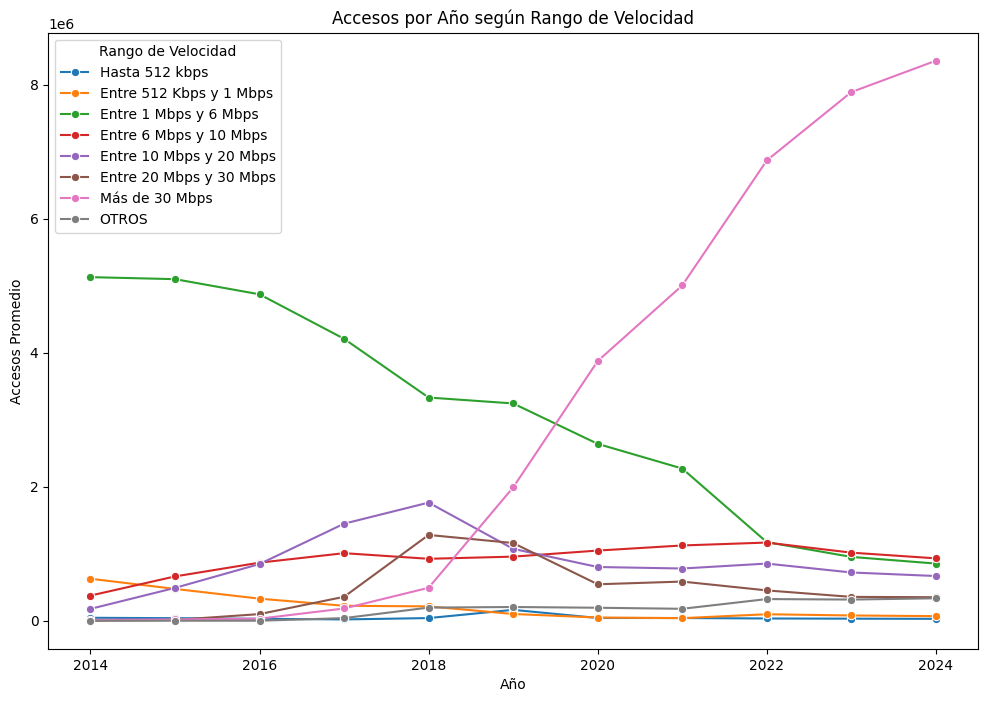

In [80]:
promedio_por_año = totales_accesos_por_rango[['Año', 'Hasta 512 kbps', 'Entre 512 Kbps y 1 Mbps', 'Entre 1 Mbps y 6 Mbps', 'Entre 6 Mbps y 10 Mbps', 'Entre 10 Mbps y 20 Mbps', 'Entre 20 Mbps y 30 Mbps', 'Más de 30 Mbps', 'OTROS']].groupby('Año').mean()

# Configurar el tamaño del gráfico
plt.figure(figsize=(12, 8))

# Graficar líneas para cada columna
sns.lineplot(x='Año', y='Hasta 512 kbps', data=promedio_por_año, marker='o', label='Hasta 512 kbps')
sns.lineplot(x='Año', y='Entre 512 Kbps y 1 Mbps', data=promedio_por_año, marker='o', label='Entre 512 Kbps y 1 Mbps')
sns.lineplot(x='Año', y='Entre 1 Mbps y 6 Mbps', data=promedio_por_año, marker='o', label='Entre 1 Mbps y 6 Mbps')
sns.lineplot(x='Año', y='Entre 6 Mbps y 10 Mbps', data=promedio_por_año, marker='o', label='Entre 6 Mbps y 10 Mbps')
sns.lineplot(x='Año', y='Entre 10 Mbps y 20 Mbps', data=promedio_por_año, marker='o', label='Entre 10 Mbps y 20 Mbps')
sns.lineplot(x='Año', y='Entre 20 Mbps y 30 Mbps', data=promedio_por_año, marker='o', label='Entre 20 Mbps y 30 Mbps')
sns.lineplot(x='Año', y='Más de 30 Mbps', data=promedio_por_año, marker='o', label='Más de 30 Mbps')
sns.lineplot(x='Año', y='OTROS', data=promedio_por_año, marker='o', label='OTROS')

# Añadir títulos y etiquetas
plt.title('Accesos por Año según Rango de Velocidad')
plt.xlabel('Año')
plt.ylabel('Accesos Promedio')
plt.legend(title='Rango de Velocidad')

# Mostrar el gráfico
plt.show()


VEMOS QUE HAY UNA TENDENCIA A QUE LA VELOCIDAD DE MAS DE 30 MB CREZCA EN LOS ULTIMOS AÑOS, A DIFERENCIA DEL RESTO DE LAS VELOCIDAD QUE TIENDEN A DECRECER CON LOS AÑOS.

In [81]:
# Guardamos el archivo. 

totales_accesos_por_rango.to_excel('Procesed data/totales-accesos-por-rango.xlsx', index=False)

HOJA Accesos por rangos

In [82]:
accesos_por_rango_velocidad = pd.read_excel('Raw data\Internet (Principal).xlsx', sheet_name='Accesos por rangos')

In [83]:
accesos_por_rango_velocidad.head()

,Año,Trimestre,Provincia,HASTA 512 kbps,+ 512 Kbps - 1 Mbps,+ 1 Mbps - 6 Mbps,+ 6 Mbps - 10 Mbps,+ 10 Mbps - 20 Mbps,+ 20 Mbps - 30 Mbps,+ 30 Mbps,OTROS,Total
0,2024,2,Buenos Aires,25287.0,23034.0,222627.0,221660.0,244528.0,106302.0,4020395.0,125547.0,4989380.0
1,2024,2,Capital Federal,518.0,4122.0,24539.0,40296.0,33158.0,5633.0,1355333.0,0.0,1463599.0
2,2024,2,Catamarca,72.0,164.0,2660.0,3093.0,3799.0,1279.0,63954.0,53.0,75074.0
3,2024,2,Chaco,236.0,349.0,14594.0,8336.0,6208.0,6454.0,107707.0,3208.0,147092.0
4,2024,2,Chubut,125.0,1139.0,43699.0,31971.0,22696.0,19827.0,38212.0,16554.0,174223.0


In [84]:
accesos_por_rango_velocidad.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Año                  1000 non-null   int64  
 1   Trimestre            1000 non-null   int64  
 2   Provincia            1000 non-null   object 
 3   HASTA 512 kbps       1000 non-null   float64
 4   + 512 Kbps - 1 Mbps  1000 non-null   float64
 5   + 1 Mbps - 6 Mbps    1000 non-null   float64
 6   + 6 Mbps - 10 Mbps   1000 non-null   float64
 7   + 10 Mbps - 20 Mbps  1000 non-null   float64
 8   + 20 Mbps - 30 Mbps  1000 non-null   float64
 9   + 30 Mbps            1000 non-null   float64
 10  OTROS                994 non-null    float64
 11  Total                1000 non-null   float64
dtypes: float64(9), int64(2), object(1)
memory usage: 93.9+ KB


In [85]:
accesos_por_rango_velocidad['OTROS'].describe()

count       994.000000
mean       6510.467807
std       15344.465875
min       -1945.000000
25%           0.000000
50%         346.500000
75%        6830.750000
max      125547.000000
Name: OTROS, dtype: float64

In [ ]:
# vemos que hay valores nulos en la columna OTROS y tambien valores negativos. 

In [86]:
accesos_por_rango_velocidad[accesos_por_rango_velocidad['OTROS'].isna()]

,Año,Trimestre,Provincia,HASTA 512 kbps,+ 512 Kbps - 1 Mbps,+ 1 Mbps - 6 Mbps,+ 6 Mbps - 10 Mbps,+ 10 Mbps - 20 Mbps,+ 20 Mbps - 30 Mbps,+ 30 Mbps,OTROS,Total
481,2019,2,Capital Federal,74.0,1027.0,281370.0,124087.0,239691.0,296155.0,475991.0,NaN,1418395.0
491,2019,2,La Rioja,9.0,11.0,39819.0,4297.0,4857.0,13.0,1298.0,NaN,50304.0
492,2019,2,Mendoza,20.0,2522.0,205165.0,2971.0,10092.0,1256.0,234.0,NaN,222260.0
499,2019,2,Santa Cruz,25.0,84.0,24861.0,3806.0,1202.0,28.0,4.0,NaN,30010.0
502,2019,2,Tierra Del Fuego,6.0,123.0,41824.0,4241.0,1573.0,96.0,32.0,NaN,47895.0
503,2019,2,Tucumán,16.0,157.0,78891.0,44296.0,24291.0,628.0,18394.0,NaN,166673.0


In [ ]:
# Vamos a comprobar que la suma de los valores de las velocidad para la misma fila es igual al total. Esto 
# quiere decir que los valores faltantes en realidad son cero. 

In [106]:
accesos_por_rango_velocidad[accesos_por_rango_velocidad['OTROS'].isna()].iloc[:,3:10].sum(axis=1)

481    1418395.0
491      50304.0
492     222260.0
499      30010.0
502      47895.0
503     166673.0
dtype: float64

In [107]:
# Reemplazamos los valores faltantes por el numero 0.

accesos_por_rango_velocidad['OTROS'].fillna(value=0, inplace=True)

In [109]:
accesos_por_rango_velocidad.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Año                  1000 non-null   int64  
 1   Trimestre            1000 non-null   int64  
 2   Provincia            1000 non-null   object 
 3   HASTA 512 kbps       1000 non-null   float64
 4   + 512 Kbps - 1 Mbps  1000 non-null   float64
 5   + 1 Mbps - 6 Mbps    1000 non-null   float64
 6   + 6 Mbps - 10 Mbps   1000 non-null   float64
 7   + 10 Mbps - 20 Mbps  1000 non-null   float64
 8   + 20 Mbps - 30 Mbps  1000 non-null   float64
 9   + 30 Mbps            1000 non-null   float64
 10  OTROS                1000 non-null   float64
 11  Total                1000 non-null   float64
dtypes: float64(9), int64(2), object(1)
memory usage: 93.9+ KB


In [ ]:
# Vemos los valores negativos.

accesos_por_rango_velocidad[accesos_por_rango_velocidad['OTROS'] < 0]

,Año,Trimestre,Provincia,HASTA 512 kbps,+ 512 Kbps - 1 Mbps,+ 1 Mbps - 6 Mbps,+ 6 Mbps - 10 Mbps,+ 10 Mbps - 20 Mbps,+ 20 Mbps - 30 Mbps,+ 30 Mbps,OTROS,Total
323,2021,1,La Rioja,18.0,1.0,36749.0,5968.0,4604.0,215.0,5074.0,-1.0,52628.0
331,2021,1,Santa Cruz,50.0,0.0,30655.0,8334.0,6987.0,1337.0,647.0,-1945.0,46065.0


In [124]:
# Por tratarse de un valor de la columna OTROS y dado que estamos haciendo un MVP, reemplazamos rapidamente estos valores
# por cero.

accesos_por_rango_velocidad.loc[323,'OTROS'] = 0
accesos_por_rango_velocidad.loc[331,'OTROS'] = 0

In [125]:
print(accesos_por_rango_velocidad.loc[323,'OTROS'])
print(accesos_por_rango_velocidad.loc[331,'OTROS'])

0.0
0.0


In [126]:
# Guardamos el dataset.

accesos_por_rango_velocidad.to_excel('Procesed data/accesos-por-rango-velocidad.xlsx', index=False)

HOJA Ingresos

In [65]:
ingresos = pd.read_excel('Raw data\Internet (Principal).xlsx', sheet_name='Ingresos ')

In [66]:
ingresos

,Año,Trimestre,Ingresos (miles de pesos),Periodo
0,2024,2,4.420322e+08,Abr-Jun 2024
1,2024,1,3.461990e+08,Ene-Mar 2024
2,2023,4,1.673760e+08,Oct-Dic 2023
3,2023,3,1.331066e+08,Jul-Sept 2023
4,2023,2,1.180603e+08,Jun-Mar 2023
5,2033,1,1.041350e+08,Ene-Mar 2023
6,2022,4,7.244348e+07,Oct-Dic 2022
7,2022,3,6.408678e+07,Jul-Sept 2022
8,2022,2,6.041950e+07,Abr-Jun 2022
9,2022,1,5.521931e+07,Ene-Mar 2022


In [67]:
# Vemos que hay un valor que no corresponde en el Año: 2033. 

ingresos['Año'][ingresos['Año'] == 2033] = 2023

C:\Users\franc\AppData\Local\Temp\ipykernel_5652\249687987.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ingresos['Año'][ingresos['Año'] == 2033] = 2023


In [68]:
ingresos

,Año,Trimestre,Ingresos (miles de pesos),Periodo
0,2024,2,4.420322e+08,Abr-Jun 2024
1,2024,1,3.461990e+08,Ene-Mar 2024
2,2023,4,1.673760e+08,Oct-Dic 2023
3,2023,3,1.331066e+08,Jul-Sept 2023
4,2023,2,1.180603e+08,Jun-Mar 2023
5,2023,1,1.041350e+08,Ene-Mar 2023
6,2022,4,7.244348e+07,Oct-Dic 2022
7,2022,3,6.408678e+07,Jul-Sept 2022
8,2022,2,6.041950e+07,Abr-Jun 2022
9,2022,1,5.521931e+07,Ene-Mar 2022


In [69]:
ingresos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42 entries, 0 to 41
Data columns (total 4 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Año                        42 non-null     int64  
 1   Trimestre                  42 non-null     int64  
 2   Ingresos (miles de pesos)  42 non-null     float64
 3   Periodo                    42 non-null     object 
dtypes: float64(1), int64(2), object(1)
memory usage: 1.4+ KB


In [70]:
# Borramos la columna 'Periodo'.

ingresos.drop(labels='Periodo', axis=1, inplace=True)

In [71]:
# Agregamos columna id para organizacion.

ingresos['id'] = ingresos['Año'].astype(str).str.cat(ingresos['Trimestre'].astype(str),sep='-')

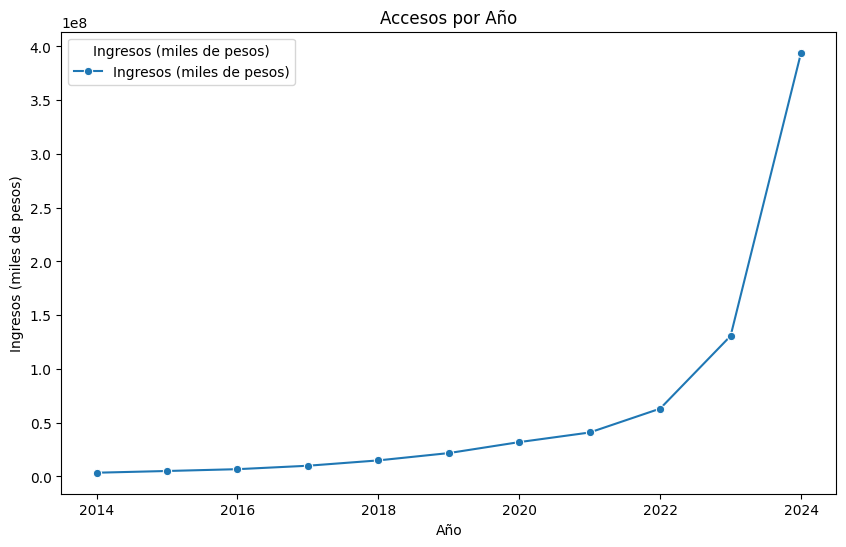

In [72]:
# Vemos el comportamiento de los ingresos.

promedio_por_año = ingresos[['Año', 'Ingresos (miles de pesos)']].groupby('Año').mean()

# Graficamos para visualizar el comportamiento

plt.figure(figsize=(10, 6))
sns.lineplot(x='Año', y='Ingresos (miles de pesos)', data=promedio_por_año, marker='o', label='Ingresos (miles de pesos)')

# Añadir títulos y etiquetas
plt.title('Accesos por Año')
plt.xlabel('Año')
plt.ylabel('Ingresos (miles de pesos)')
plt.legend(title='Ingresos (miles de pesos)')

# Mostrar el gráfico
plt.show()

In [73]:
ingresos.head()

,Año,Trimestre,Ingresos (miles de pesos),id
0,2024,2,4.420322e+08,2024-2
1,2024,1,3.461990e+08,2024-1
2,2023,4,1.673760e+08,2023-4
3,2023,3,1.331066e+08,2023-3
4,2023,2,1.180603e+08,2023-2


In [91]:
# Vamos a pasar los valores de ingresos a dolares para tener una comparacion mas estable en el tiempo que el peso.
# Fuente de los historicos del valor del dolar: Banco de la Nacion Argentina.

dolar_historico = pd.read_csv('Raw data\dolar_historico.csv', sep=';')

In [92]:
dolar_historico.head()

,Fecha cotizacion,Compra,Venta,Unnamed: 3
0,2/1/2014,"6,5050","6,5450",NaN
1,3/1/2014,"6,5200","6,5600",NaN
2,6/1/2014,"6,5550","6,5950",NaN
3,7/1/2014,"6,5600","6,6000",NaN
4,8/1/2014,"6,5650","6,6050",NaN


In [93]:
dolar_historico.drop(labels=['Compra', 'Unnamed: 3'], axis=1, inplace=True)

In [94]:
dolar_historico['Fecha cotizacion'] = pd.to_datetime(dolar_historico['Fecha cotizacion'], format='%d/%m/%Y')

In [95]:
dolar_historico['Año'] = dolar_historico['Fecha cotizacion'].dt.year
dolar_historico['Trimestre'] = dolar_historico['Fecha cotizacion'].dt.quarter

In [96]:
dolar_historico['id'] = dolar_historico['Año'].astype(str).str.cat(dolar_historico['Trimestre'].astype(str),sep='-')

In [98]:
dolar_historico.drop(labels=['Fecha cotizacion', 'Año', 'Trimestre'], axis=1, inplace=True)

In [99]:
dolar_historico.rename(columns={'Venta':'Precio_dolar'}, inplace=True)

In [102]:
dolar_historico

,Precio_dolar,id
0,"6,5450",2014-1
1,"6,5600",2014-1
2,"6,5950",2014-1
3,"6,6000",2014-1
4,"6,6050",2014-1
...,...,...
2644,"1017,5000",2024-4
2645,"1018,0000",2024-4
2646,"1018,5000",2024-4
2647,"1019,0000",2024-4


In [109]:
dolar_historico['Precio_dolar'] = dolar_historico['Precio_dolar'].str.replace(',', '.')

In [111]:
# Cambiamos el formato de la columna a float.

dolar_historico['Precio_dolar'] = dolar_historico['Precio_dolar'].astype(float)

In [117]:
# Vamos a agrupar por id y calculamos el valor promedio del precio del dolar.

dolar_historico = dolar_historico.groupby('id').mean()

In [118]:
dolar_historico

,Precio_dolar
id,
2014-1,7.621500
2014-2,8.085763
2014-3,8.296672
2014-4,8.507627
2015-1,8.691017
2015-2,8.958525
2015-3,9.255703
2015-4,10.228583
2016-1,14.642333


In [121]:
ingresos = pd.merge(ingresos, dolar_historico, how='left', on='id')

In [122]:
ingresos

,Año,Trimestre,Ingresos (miles de pesos),id,Precio_dolar
0,2024,2,4.420322e+08,2024-2,904.500000
1,2024,1,3.461990e+08,2024-1,852.762500
2,2023,4,1.673760e+08,2023-4,462.696949
3,2023,3,1.331066e+08,2023-3,326.585938
4,2023,2,1.180603e+08,2023-2,241.129310
5,2023,1,1.041350e+08,2023-1,199.080645
6,2022,4,7.244348e+07,2022-4,168.929167
7,2022,3,6.408678e+07,2022-3,141.992188
8,2022,2,6.041950e+07,2022-2,123.055085
9,2022,1,5.521931e+07,2022-1,111.700820


In [ ]:
ingresos['ingresos_usd'] = ingresos['Ingresos (miles de pesos)'] / ingresos['Precio_dolar']

In [130]:
ingresos = ingresos.sort_values(by=['Año', 'Trimestre'])

In [131]:
ingresos.head()

,Año,Trimestre,Ingresos (miles de pesos),id,Precio_dolar,ingresos_usd
41,2014,1,2.984054e+06,2014-1,7.621500,391531.090833
40,2014,2,3.270816e+06,2014-2,8.085763,404515.482394
39,2014,3,3.478638e+06,2014-3,8.296672,419281.103943
38,2014,4,3.950441e+06,2014-4,8.507627,464341.081864
37,2015,1,4.876385e+06,2015-1,8.691017,561083.397213


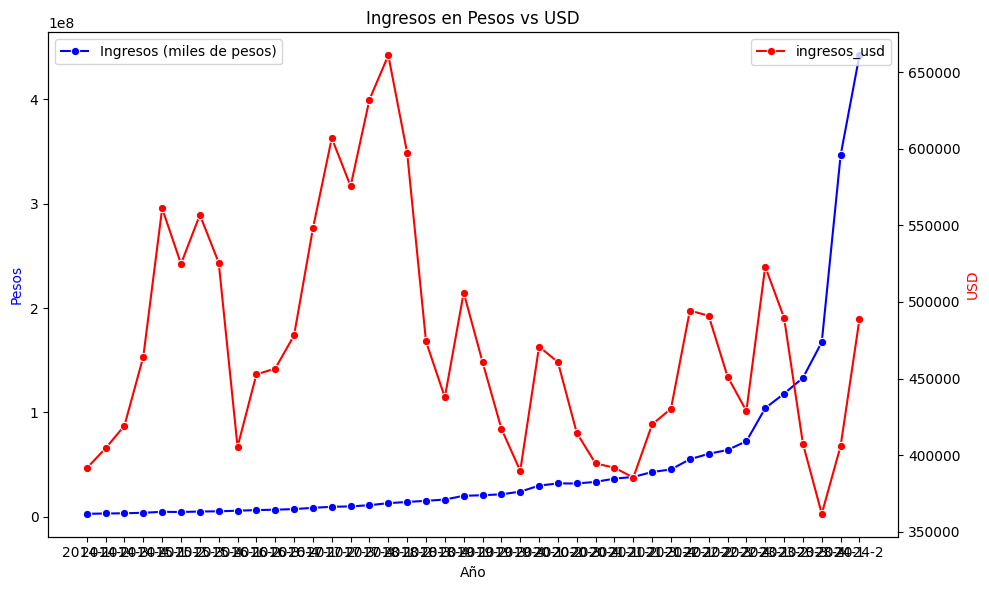

In [138]:
# Crear la figura y el eje primario
fig, ax1 = plt.subplots(figsize=(10, 6))

# Trazar 'Valor1' en el eje primario
sns.lineplot(data=ingresos, x='id', y='Ingresos (miles de pesos)', ax=ax1, marker='o', label='Ingresos (miles de pesos)', color='b')

# Crear el eje secundario
ax2 = ax1.twinx()

# Trazar 'Valor2' en el eje secundario
sns.lineplot(data=ingresos, x='id', y='ingresos_usd', ax=ax2, marker='o', label='ingresos_usd', color='r')

# Añadir títulos y etiquetas
ax1.set_title('Ingresos en Pesos vs USD')
ax1.set_xlabel('Año')
ax1.set_ylabel('Pesos', color='b')
ax2.set_ylabel('USD', color='r')

# Mostrar el gráfico
fig.tight_layout()
plt.show()


In [137]:
ingresos[(ingresos['Año'] >= 2015) & (ingresos['Año'] <= 2016)]

,Año,Trimestre,Ingresos (miles de pesos),id,Precio_dolar,ingresos_usd
37,2015,1,4.876385e+06,2015-1,8.691017,561083.397213
36,2015,2,4.701791e+06,2015-2,8.958525,524839.851958
35,2015,3,5.153739e+06,2015-3,9.255703,556817.652290
34,2015,4,5.376899e+06,2015-4,10.228583,525673.891562
33,2016,1,5.936845e+06,2016-1,14.642333,405457.569593
32,2016,2,6.534241e+06,2016-2,14.433065,452727.180025
31,2016,3,6.912442e+06,2016-3,15.142188,456502.175716
30,2016,4,7.483980e+06,2016-4,15.649180,478234.657438


In [140]:
ingresos[ingresos['Año'] == 2018]

,Año,Trimestre,Ingresos (miles de pesos),id,Precio_dolar,ingresos_usd
25,2018,1,1.317146e+07,2018-1,19.926667,660996.615803
24,2018,2,1.431947e+07,2018-2,23.975000,597266.630270
23,2018,3,1.541098e+07,2018-3,32.498413,474207.181612
22,2018,4,1.663769e+07,2018-4,38.008475,437736.235787


PODEMOS VER QUE LOS INGRESOS EN DOLARES SON MUY VARIADOS. POR EJEMPLO, PARA EL TRIMESTRE 4 DEL 2015 Y TRIMESTRE 1 DEL 2016, LA DIFERENCIA VIENE DADA POR UN AUMENTO EN EL VALOR DE DOLAR (usd 10,22 A usd 14,64). ASI TAMBIEN SE PUEDE OBSERVAR QUE EN EL AÑO 2018 EXISTEN AUMENTOS CONSIDERABLES EN EL VALOR DEL DOLAR, LO CUAL EXPLICA LO QUE SUCEDE EN LA GRAFICA.

PODEMOS SABER CON ESTOS VALORES, QUE LA INESTABILIDAD EN EL VALOR DEL PESO, GENERA INCERTIDUMBRE EN LOS INGRESOS.

In [128]:
ingresos.to_excel('Procesed data/ingresos.xlsx', index=False)